In [35]:
HQA_MNIST_SAVE_PATH = './checkpoints/hqa_mnist.pt'

In [36]:
import torch
from hqa_lightning import HQA2D_Lightning
import matplotlib.pyplot as plt

import os

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ", device)

Device:  cuda


In [37]:
if os.path.exists(HQA_MNIST_SAVE_PATH):
    hqa_model = torch.load(HQA_MNIST_SAVE_PATH).to(device)
    print(f"Loaded {len(hqa_model)} layer model from checkpoint.")
else:
    print("HQA checkpoint not found!")

Loaded 5 layer model from checkpoint.


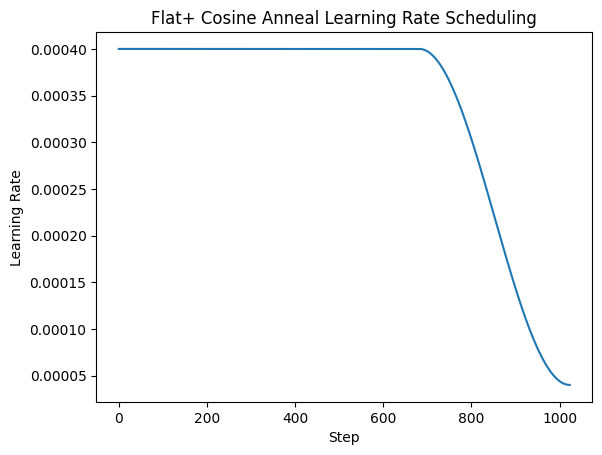

In [55]:
from hqa.scheduler import FlatCA

n_steps = 1024

lrs = []

optimizer = torch.optim.Adam(hqa_model.parameters(), lr=hqa_model.lr)
scheduler = FlatCA(optimizer, steps=n_steps, eta_min=4e-5)

for _ in range(n_steps):
    lrs.append(scheduler.get_lr())
    scheduler.step()

plt.plot(lrs)
plt.title("Learning Rate Scheduling")
plt.ylabel("Learning Rate")
plt.xlabel("Step")
plt.title("Flat+ Cosine Anneal Learning Rate Scheduling")
plt.savefig("./resources/scheduler.png")
plt.show()